In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA (EXPLORARY DATA ANALYSIS)

### STEP 1 - Import and Inspect Data

In [102]:
df = pd.read_csv("../../datasets/airbnb_listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [104]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [105]:
df.shape

(48895, 16)

In [106]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### STEP 2 - Handling Missing Values

In [107]:
df = df.drop(columns=["id", "latitude", "longitude"])
df["last_review"].fillna("", inplace=True)
df["reviews_per_month"].fillna(0, inplace=True)
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### STEP 3 - Explore Data Characteristics & Transformations

In [108]:
df["last_review"] = pd.to_datetime(df["last_review"])
df["last_review_year"] = df["last_review"].dt.year
df["last_review_month"] = df["last_review"].dt.month

df = df[df["minimum_nights"] <= 365]
df = df[df["availability_365"] <= 365]

df["availability_rate"] = df["availability_365"] / 365


df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,availability_rate
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0,1.000000
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0,0.972603
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaT,0.00,1,365,NaN,NaN,1.000000
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0,0.531507
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,11.0,0.000000


### STEP 4 - Handling Outliers

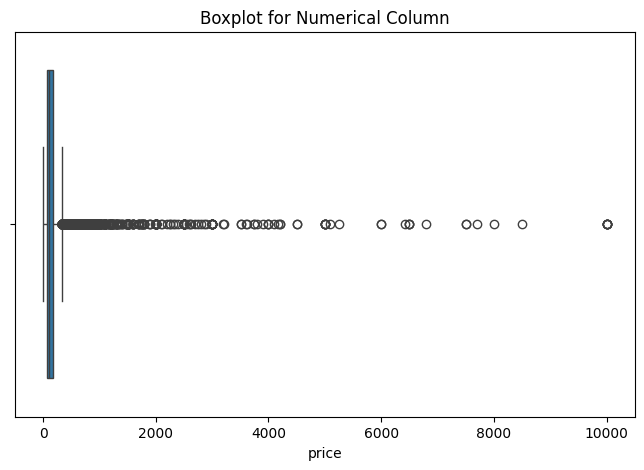

In [109]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot for Numerical Column')
plt.show()

In [110]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

iqr_mask = (df["price"] >= lower) & (df["price"] <= upper)
df = df[iqr_mask]
df


,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,availability_rate
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0,1.000000
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0,0.972603
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaT,0.00,1,365,NaN,NaN,1.000000
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0,0.531507
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,11.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaT,0.00,2,9,NaN,NaN,0.024658
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,NaT,0.00,2,36,NaN,NaN,0.098630
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,NaT,0.00,1,27,NaN,NaN,0.073973
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaT,0.00,6,2,NaN,NaN,0.005479


### STEP 5 - Visualizing Data Relationships

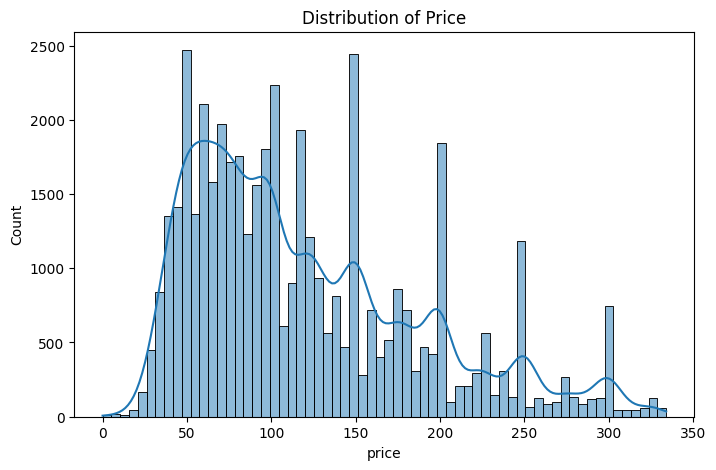

In [111]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

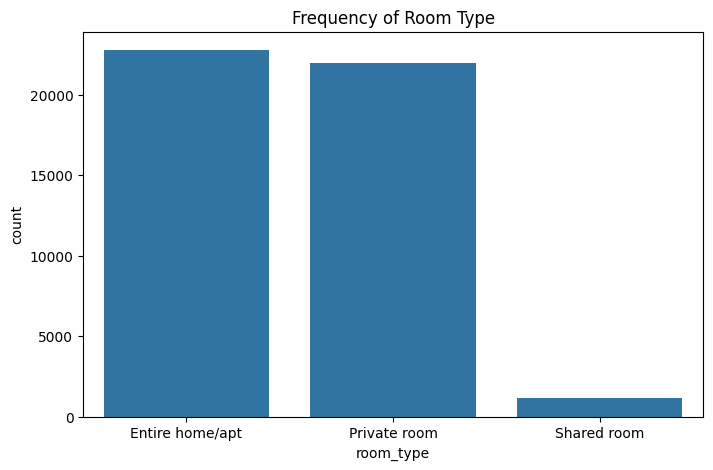

In [112]:
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title('Frequency of Room Type')
plt.show()

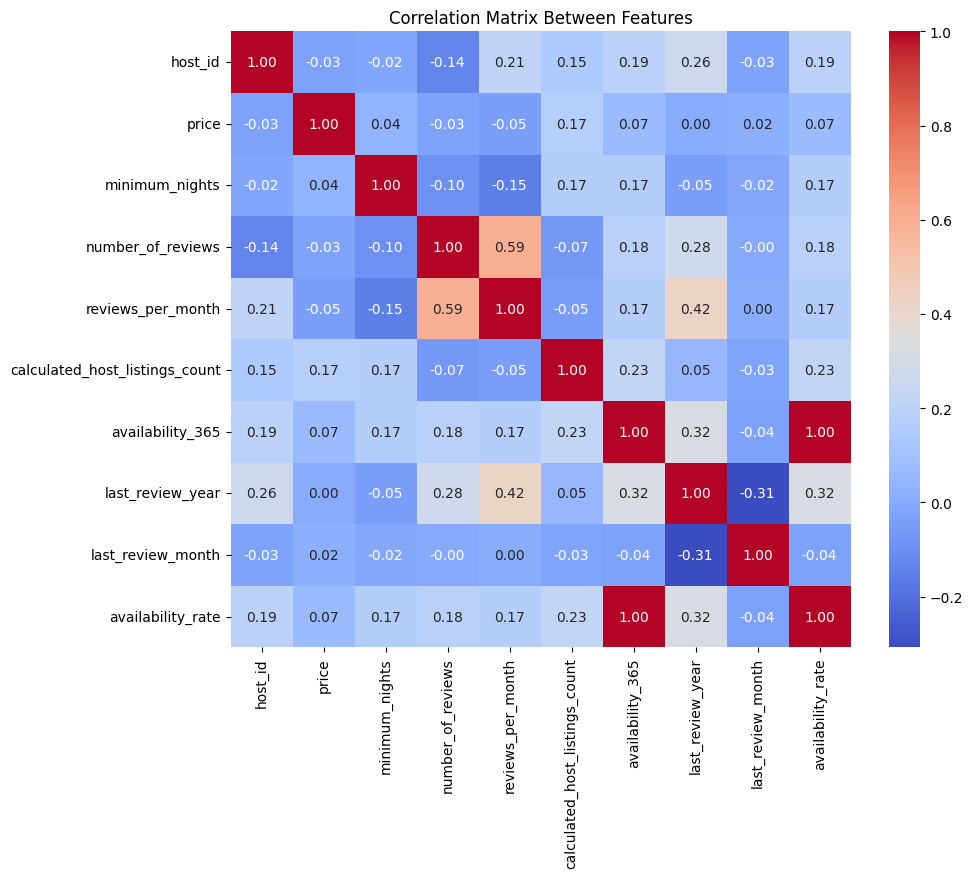

In [113]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True, # Show the correlation values on the heatmap
    cmap='coolwarm',
    fmt=".2f" # Format annotation to two decimal places
)
plt.title('Correlation Matrix Between Features')
plt.show()

In [114]:
df.shape

(45910, 16)

## ANALYSIS

### Avg Price Based on Neighbourhood Group

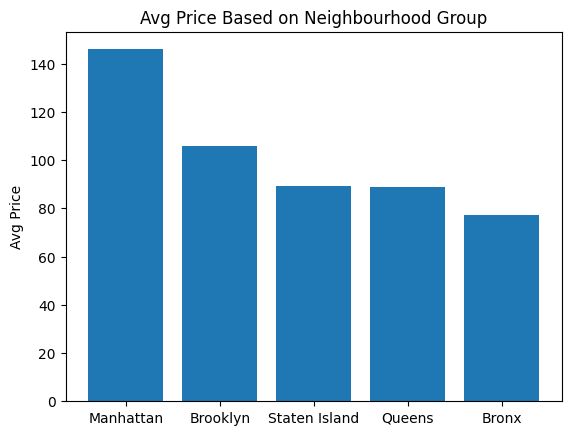

In [96]:
avg_price_neighbourhood_group = df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False).reset_index()
avg_price_neighbourhood_group.rename(columns={"neighbourhood_group": "Neighbourhood Group", "price": "Avg Price"}, inplace=True)
avg_price_neighbourhood_group

fig, ax = plt.subplots()

labels = avg_price_neighbourhood_group["Neighbourhood Group"]
prices = avg_price_neighbourhood_group["Avg Price"]


ax.bar(labels, prices)

ax.set_ylabel('Avg Price')
ax.set_title('Avg Price Based on Neighbourhood Group')

plt.show()

### Room Type by Occupancy Rate (Availability Analysis)

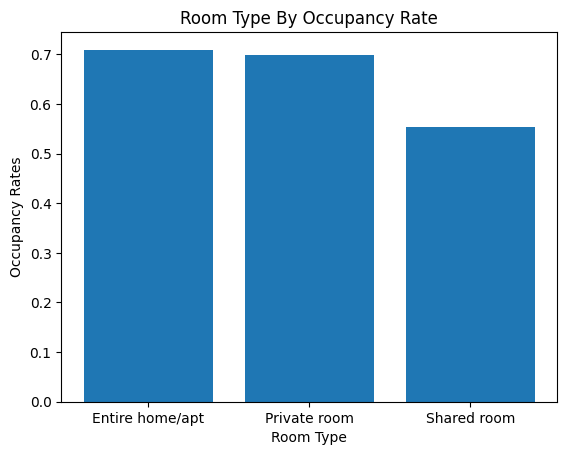

In [98]:
room_type_occupancy_rate = (1- df.groupby("room_type").agg(occupancy_rate=("availability_rate", "mean"))).reset_index()
fig, ax = plt.subplots()

labels = room_type_occupancy_rate["room_type"].str.capitalize()
rates = room_type_occupancy_rate["occupancy_rate"]

ax.bar(labels, rates)

ax.set_ylabel('Occupancy Rates')
ax.set_xlabel('Room Type')

ax.set_title('Room Type By Occupancy Rate')

plt.show()

### Host Listings

In [86]:
host_listings = df.groupby(["host_id", "host_name"])["name"].count().sort_values(ascending=False).reset_index().rename(columns={"host_id": "ID", "host_name": "Host Name", "name": "Listing Counts"})
host_listings

,ID,Host Name,Listing Counts
0,219517861,Sonder (NYC),272
1,107434423,Blueground,180
2,137358866,Kazuya,103
3,12243051,Sonder,95
4,30283594,Kara,95
...,...,...,...
35354,85288337,Jeff,0
35355,71552588,Andrea,0
35356,33377685,Jonathan,0
35357,37306329,Juliette,0


### Price Sensitivity

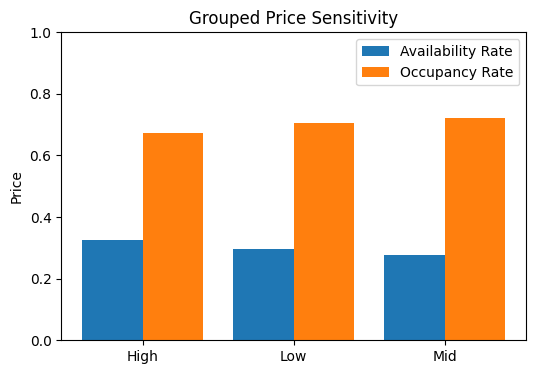

In [95]:
low_limit = df["price"].quantile(0.33)
high_limit = df["price"].quantile(0.66)

def define_price_segment(x):
    if x < low_limit:
        return "Low"
    elif x >= low_limit and x<= high_limit:
        return "Mid"
    else:
        return "High"

df["price_segment"] = df["price"].apply(define_price_segment)
price_sensitivity = (
    df.groupby("price_segment")["availability_rate"].mean().reset_index()
)

price_sensitivity["occupancy_rate"] = 1 - price_sensitivity["availability_rate"]
price_sensitivity.rename(columns={"price_segment": "Price Segment", "availability_rate": "Availability Rate", "occupancy_rate": "Occupancy Rate"}, inplace=True)

fig, ax = plt.subplots(figsize=(6,4))
x1 = price_sensitivity["Price Segment"]
y1 = price_sensitivity["Availability Rate"]
y2 = price_sensitivity["Occupancy Rate"]


w, x = 0.4, np.arange(len(x1))

ax.bar(x - w/2, y1, width=w, label="Availability Rate")
ax.bar(x + w/2, y2, width=w, label="Occupancy Rate")

ax.set_xticks(x)
ax.set_xticklabels(x1)
ax.set_ylabel('Price')
ax.set_title('Grouped Price Sensitivity')
ax.set_ylim(0, 1)
ax.legend()
plt.show()

### Price vs Popularity

In [88]:
low_limit = df["price"].quantile(0.33)
high_limit = df["price"].quantile(0.66)

def define_price_segment(x):
    if x < low_limit:
        return "Low"
    elif x >= low_limit and x<= high_limit:
        return "Mid"
    else:
        return "High"

df["price_segment"] = df["price"].apply(define_price_segment)

price_review = (
    df.groupby("price_segment")["number_of_reviews"].mean().sort_values(ascending=False).reset_index()
)
price_review = price_review.rename(columns={"price_segment": "Price Segment", "number_of_reviews": "Number of Reviews"})
price_review

,Price Segment,Number of Reviews
0,Mid,26.854519
1,Low,23.009875
2,High,21.717584
